In [ ]:
## Online Transactions Customer Behaviour RMF Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file_path = '/content/online_retail.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [ ]:
df.isnull().sum()

,0
index,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
## dropping duplicates
df.drop_duplicates(inplace=True)

In [ ]:
## dropping missing values
df.dropna(subset=['CustomerID'],inplace=True)

In [ ]:
df.isnull().sum()

,0
index,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
df.shape

(406829, 9)

In [ ]:
## Reduced number of rows from 541909 to 406829 by dropping null values

In [ ]:
## Creating 'Total' columns to calculate spending per transaction
df['Total'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df["InvoiceDate"].max()

'9/9/2011 9:52'

In [ ]:
## Defining RFM metrics
## R-Recency
## F-Frequency
## M-Monetary Value

import datetime as dt

#Recency
# Convert 'InvoiceDate' column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

latest_date = df['InvoiceDate'].max() + dt.timedelta(days = 1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'count',
    'Total': 'sum'
}).reset_index()

rfm.rename(columns = {
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Total': 'MonetaryValue'
}, inplace = True)

In [ ]:
#Recency score based on quantiles
#Assigning labels from 1-5,  5 being the highest recency
rfm["Recency_score"] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1])

#Frequency score
rfm["Frequency_score"] = pd.qcut(rfm['Frequency'].rank(method = "first"), 5, labels = [1, 2, 3, 4, 5])

In [ ]:
#Combine Recency and Frequency scores to create RFM Segment
rfm["rfm_segment"] = rfm['Recency_score'].astype(str) + rfm['Frequency_score'].astype(str)

In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,Recency_score,Frequency_score,rfm_segment
0,12346.0,326,2,0.00,1,1,11
1,12347.0,2,182,4310.00,5,5,55
2,12348.0,75,31,1797.24,2,3,23
3,12349.0,19,73,1757.55,4,4,44
4,12350.0,310,17,334.40,1,2,12


In [ ]:
rfm

,CustomerID,Recency,Frequency,MonetaryValue,Recency_score,Frequency_score,rfm_segment
0,12346.0,326,2,0.00,1,1,11
1,12347.0,2,182,4310.00,5,5,55
2,12348.0,75,31,1797.24,2,3,23
3,12349.0,19,73,1757.55,4,4,44
4,12350.0,310,17,334.40,1,2,12
...,...,...,...,...,...,...,...
4367,18280.0,278,10,180.60,1,1,11
4368,18281.0,181,7,80.82,1,1,11
4369,18282.0,8,13,176.60,5,1,51
4370,18283.0,4,756,2094.88,5,5,55


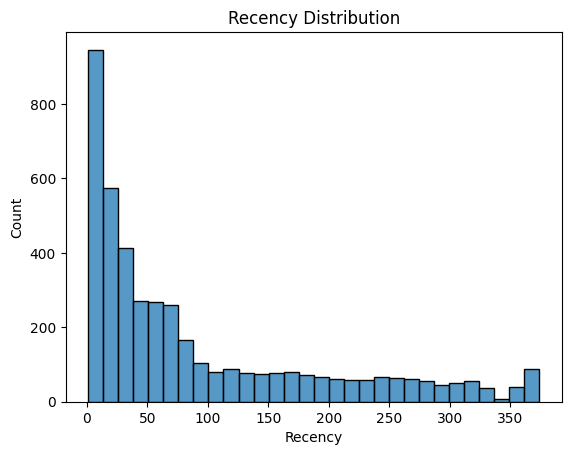

In [ ]:
## Recency Distribution Plot

import seaborn as sns
import matplotlib.pyplot as plt
#Eliminating Future warning
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


sns.histplot(data = rfm, x = 'Recency', bins = 30)
plt.title('Recency Distribution')
plt.show()

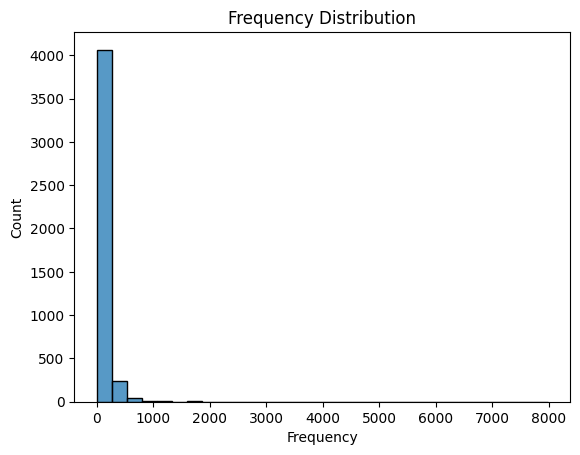

In [ ]:
## Frequency Distribution Plot

sns.histplot(data = rfm, x = 'Frequency', bins = 30)
plt.title('Frequency Distribution')
plt.show()

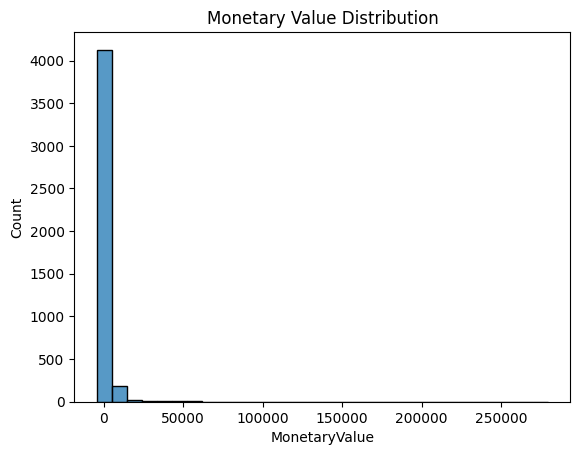

In [ ]:
## Monetary Distribution Plot

sns.histplot(data = rfm, x = 'MonetaryValue', bins = 30)
plt.title('Monetary Value Distribution')
plt.show()

In [ ]:
## Moving on to the next part i.e. Customer Segmentation

In [ ]:
segment_map = {
    r'[1-2][1-2]' : 'Hibernating',
    r'[1-2][3-4]' : 'At-Risk',
    r'[1-2]5' : "Can\'t Loose",
    r'3[1-2]' : 'About to Slip',
    r'33' : 'Need Attention',
    r'[3-4][4-5]' : 'Loyal Customers',
    r'41' : 'Promising',
    r'51' : 'New Customers',
    r'[4-5][2-3]' : 'Potential Loyalists',
    r'5[4-5]' : 'Champions',
}

In [ ]:
## Mapping RFM segments to corresponding customer segments
rfm['rfm_segment'] = rfm['rfm_segment'].replace(segment_map, regex = True)

In [ ]:
## Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'MonetaryValue']])

rfm_scaled

array([[ 2.32202285, -0.3917197 , -0.23100099],
       [-0.89373323,  0.38265697,  0.29343167],
       [-0.1691956 , -0.26695902, -0.01231622],
       ...,
       [-0.83418219, -0.34439668, -0.20951263],
       [-0.87388289,  2.85205812,  0.02390005],
       [-0.48680114, -0.0991774 , -0.00744423]])

In [ ]:
## K-means Clustering

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state=42)
kmeans.fit(rfm_scaled)
rfm['cluster']=kmeans.labels_

In [ ]:
rfm

,CustomerID,Recency,Frequency,MonetaryValue,Recency_score,Frequency_score,rfm_segment,cluster
0,12346.0,326,2,0.00,1,1,Hibernating,1
1,12347.0,2,182,4310.00,5,5,Champions,0
2,12348.0,75,31,1797.24,2,3,At-Risk,0
3,12349.0,19,73,1757.55,4,4,Loyal Customers,0
4,12350.0,310,17,334.40,1,2,Hibernating,1
...,...,...,...,...,...,...,...,...
4367,18280.0,278,10,180.60,1,1,Hibernating,1
4368,18281.0,181,7,80.82,1,1,Hibernating,1
4369,18282.0,8,13,176.60,5,1,New Customers,0
4370,18283.0,4,756,2094.88,5,5,Champions,0


In [ ]:
new_rfm = rfm[["Recency", "Frequency", "MonetaryValue", "rfm_segment"]]

In [ ]:
## Converting index to integer
new_rfm.index = new_rfm.index.astype(int)
new_rfm.head()

,Recency,Frequency,MonetaryValue,rfm_segment
0,326,2,0.00,Hibernating
1,2,182,4310.00,Champions
2,75,31,1797.24,At-Risk
3,19,73,1757.55,Loyal Customers
4,310,17,334.40,Hibernating


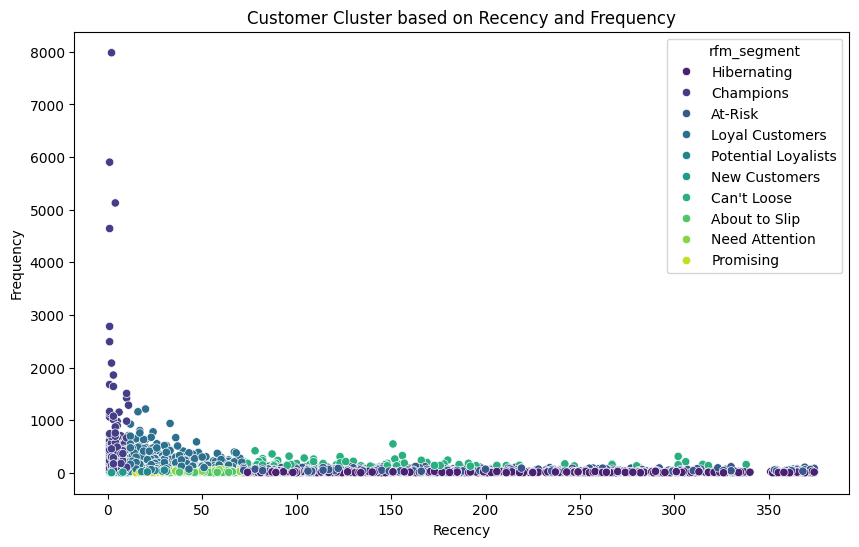

In [ ]:
## Customer Cluster based on Recency and Frequency Plot

plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Recency', y = 'Frequency', hue = 'rfm_segment', data = new_rfm, palette = 'viridis')
plt.title('Customer Cluster based on Recency and Frequency')
plt.show()

In [ ]:
## RFM Segments Plots

import plotly.express as px
#Top 10 most preferred products
segments = new_rfm['rfm_segment'].value_counts()

fig = px.bar(
     x = segments.index,
     y = segments.values,
     color = segments.index,
     text = segments.values,
     title = "RFM Segments"
)
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Count",
    font=dict(size=15, family="Arial"),
    title_font=dict(size=20, family="Arial")
)
fig.show()

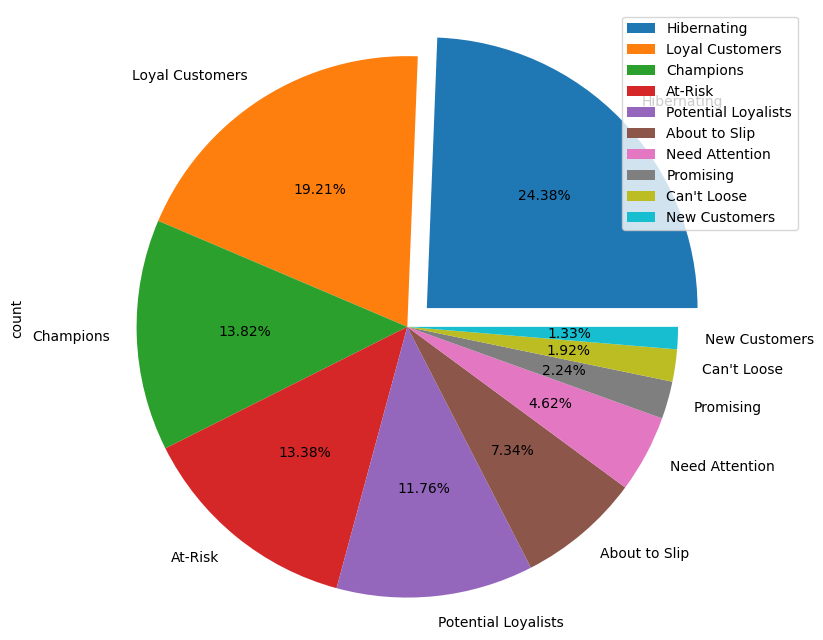

In [ ]:
## Segments Pie Chart

plt.figure(figsize = (10, 8), )
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

segments.plot(
    kind = 'pie',
    explode = explode,
    autopct = '%1.2f%%')
plt.axis('equal')
plt.legend(labels = segments.index, loc = "best")
plt.show()

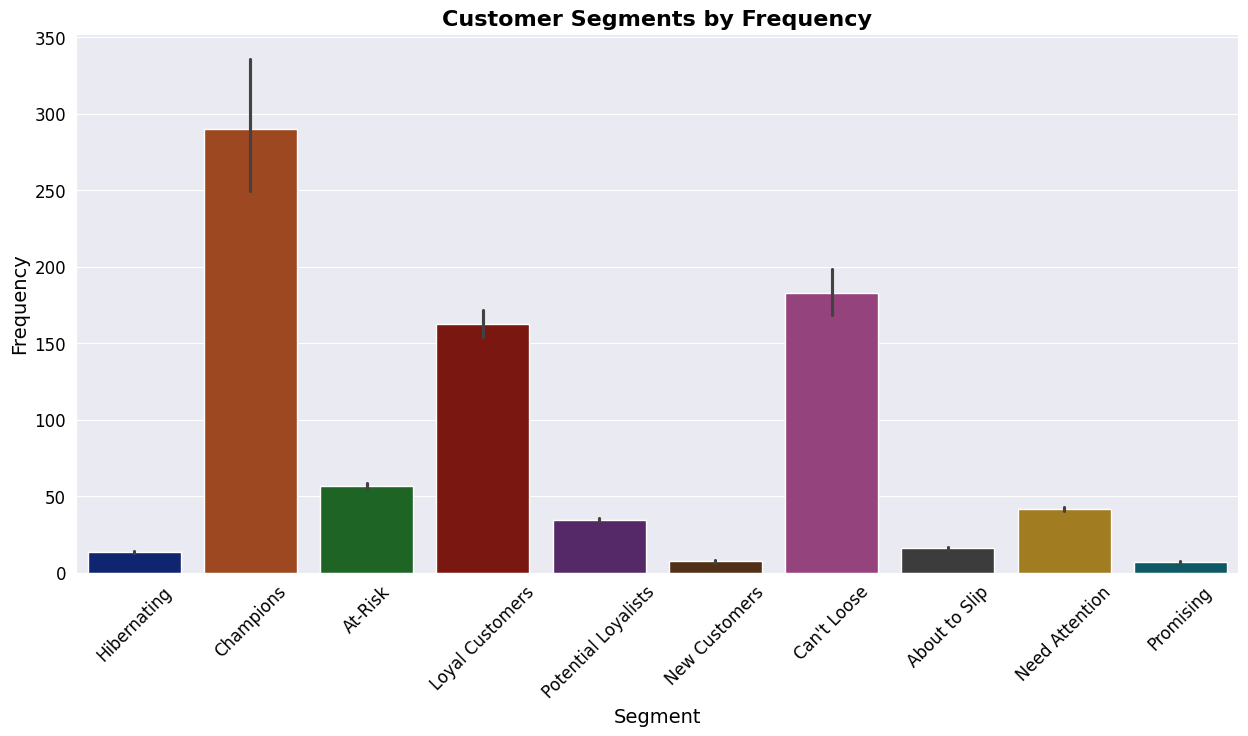

In [ ]:
## Customer Segments by Frequency Plot

sns.set_style("darkgrid")
colors = sns.color_palette("dark")

# Create the plot
plt.figure(figsize=(15, 7))
sns.barplot(x = "rfm_segment", y = "Frequency", data = new_rfm, palette=colors)
plt.title("Customer Segments by Frequency", color='black', fontsize=16, fontweight='bold')
plt.xlabel("Segment", color='black', fontsize=14)
plt.ylabel("Frequency", color='black', fontsize=14)
plt.xticks(rotation=45, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.show()

In [ ]:
## Predictions

In [ ]:
## 1. Predicting future customer spending

features = rfm[['Recency', 'Frequency', 'MonetaryValue']]

In [ ]:
## Dummy target variable

rfm['FutureSpending'] = np.random.rand(len(rfm)) * 3000

In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,Recency_score,Frequency_score,rfm_segment,cluster,FutureSpending
0,12346.0,326,2,0.00,1,1,Hibernating,1,2076.755349
1,12347.0,2,182,4310.00,5,5,Champions,0,619.756096
2,12348.0,75,31,1797.24,2,3,At-Risk,0,1330.322408
3,12349.0,19,73,1757.55,4,4,Loyal Customers,0,612.525697
4,12350.0,310,17,334.40,1,2,Hibernating,1,433.461150


In [ ]:
## Train test split

from sklearn.model_selection import train_test_split
X = features
y = rfm['FutureSpending']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
## Linear Regression Model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
## Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
## Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

pred_lr=lr.predict(X_test)
mse=mean_squared_error(y_test,pred_lr)
r2=r2_score(y_test,pred_lr)

print('Linear Regression')
print('MSE:',mse)
print('R2:',r2)

Linear Regression
MSE: 748382.9275882302
R2: -0.0016695546804250672


In [ ]:
## Predictions for Decision Tree Regressor

pred_dt=dt.predict(X_test)
mse=mean_squared_error(y_test,pred_dt)
r2=r2_score(y_test,pred_dt)

print('Decision Tree Regressor')
print('MSE:',mse)
print('R2',r2)

Decision Tree Regressor
MSE: 1551675.9997310298
R2 -1.076833330054345


In [ ]:
## Linear Regression Evaluation
results_df_lr = pd.DataFrame({'Future Spending': y_test, 'Predicted Spending': pred_lr})
results_df_lr

,Future Spending,Predicted Spending
2014,1311.362716,1493.913705
457,2317.042105,1477.981067
478,678.400627,1500.331533
438,2383.663201,1472.462355
3728,2073.001137,1472.562473
...,...,...
2798,1415.583030,1525.600344
3160,2012.051070,1479.959463
3646,1982.652981,1471.542223
1476,1825.637445,1481.958905


In [ ]:
## Decision Tree Regressor Evaluation
results_df_dt = pd.DataFrame({'Future Spending': y_test, 'Predicted Spending': pred_dt})
results_df_dt

,Future Spending,Predicted Spending
2014,1311.362716,1494.352214
457,2317.042105,2683.210500
478,678.400627,874.219362
438,2383.663201,1805.050472
3728,2073.001137,828.164225
...,...,...
2798,1415.583030,366.278150
3160,2012.051070,139.390716
3646,1982.652981,1596.594905
1476,1825.637445,2551.382583


In [ ]:
## Future Predictions

new_customer_rfm = np.array([[10, 5, 300]])
pred_spending_dt = dt.predict(new_customer_rfm)

print(f"Predicted Future Spending: {pred_spending_dt[0]}")

Predicted Future Spending: 708.924177623333


In [ ]:
## Future Predictions

new_customer_rfm = np.array([[10, 5, 300]])
pred_spending_lr = lr.predict(new_customer_rfm)

print(f"Predicted Future Spending: {pred_spending_lr[0]}")

Predicted Future Spending: 1470.389996785847


Analysis

We were able to segment customers based on their recency, frequency and monetary value.

We were able to detect our most valuable customers.

We were able to detect our loyal customers.

We were able to detect our new customers.

We were able to detect our lost customers, so we will probably find out why they left us and how to regain their loyalties.

We were able to develop a model for predicting future customer spending based on RFM analysis.

Conclusion

RFM Analysis is a crucial tool for understanding customer behaviour and segmenting them based on purchasing habits.

RFM helps in personalizing marketing strategies and improving customer engagement and retention.